In [3]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from prophet import Prophet  # For time series forecasting

In [4]:
df = pd.read_csv(r'D:\thenumerix\Data Cleaning & Exploration\TMDB_movie_dataset_v11.csv')

In [5]:
print(df.head())
print(df.info())
print(df.describe())


       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

In [6]:
df['budget'] = df['budget'].fillna(df['budget'].median())
df = df.dropna(subset=['revenue'])


In [7]:
df = df.drop_duplicates(subset='title', keep='first')


In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [9]:
df['profit'] = df['revenue'] - df['budget']
df['release_year'] = df['release_date'].dt.year

In [10]:
#VISUALIZATION # Visualize the distribution of movie budgets using a histogram.


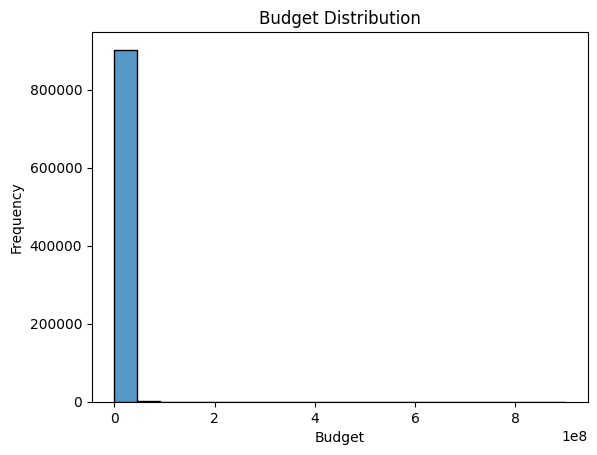

In [11]:
sns.histplot(df['budget'], bins=20)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [12]:
#VISUALIZATION #Visualize the correlation matrix of numeric columns to understand relationships between different numerical features.

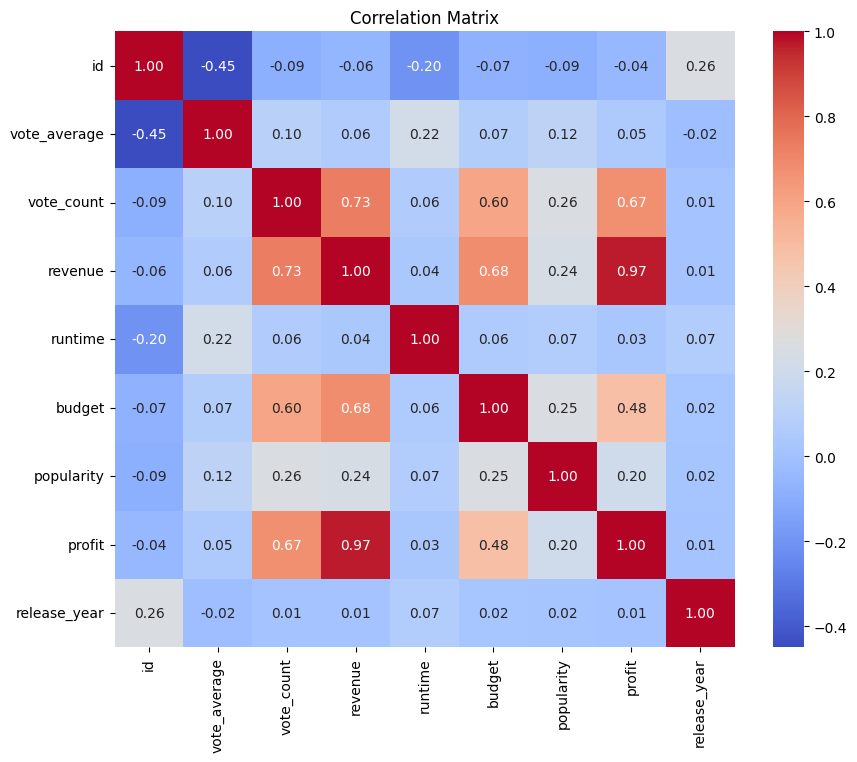

In [13]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
#Time Series Forcasting

In [15]:
time_series_data = df.groupby(df['release_year'])['id'].count().reset_index()
time_series_data.columns = ['ds', 'y']  # Prophet requires columns to be named 'ds' (date) and 'y' (value)

time_series_data = time_series_data.dropna(subset=['ds'])


In [16]:
#PRophet Model

In [17]:
model = Prophet()
model.fit(time_series_data)


20:14:57 - cmdstanpy - INFO - Chain [1] start processing
20:14:57 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
#Future Dataframing #Create a future dataframe for the next 5 years and generate forecasts using the fitted model.

In [25]:
future = model.make_future_dataframe(periods=5, freq='YE')  # Forecast 5 years into the future
print(future.tail())


                               ds
159 1970-12-31 00:00:00.000002074
160 1971-12-31 00:00:00.000002074
161 1972-12-31 00:00:00.000002074
162 1973-12-31 00:00:00.000002074
163 1974-12-31 00:00:00.000002074


In [26]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                               ds          yhat    yhat_lower    yhat_upper
159 1970-12-31 00:00:00.000002074  2.506316e+18  2.506299e+18  2.506332e+18
160 1971-12-31 00:00:00.000002074  5.019518e+18  5.019465e+18  5.019567e+18
161 1972-12-31 00:00:00.000002074  7.539606e+18  7.539504e+18  7.539703e+18
162 1973-12-31 00:00:00.000002074  1.005281e+19  1.005265e+19  1.005296e+19
163 1974-12-31 00:00:00.000002074  1.256601e+19  1.256578e+19  1.256624e+19


D:\thenumerix\Data Cleaning & Exploration\myenv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\thenumerix\Data Cleaning & Exploration\myenv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


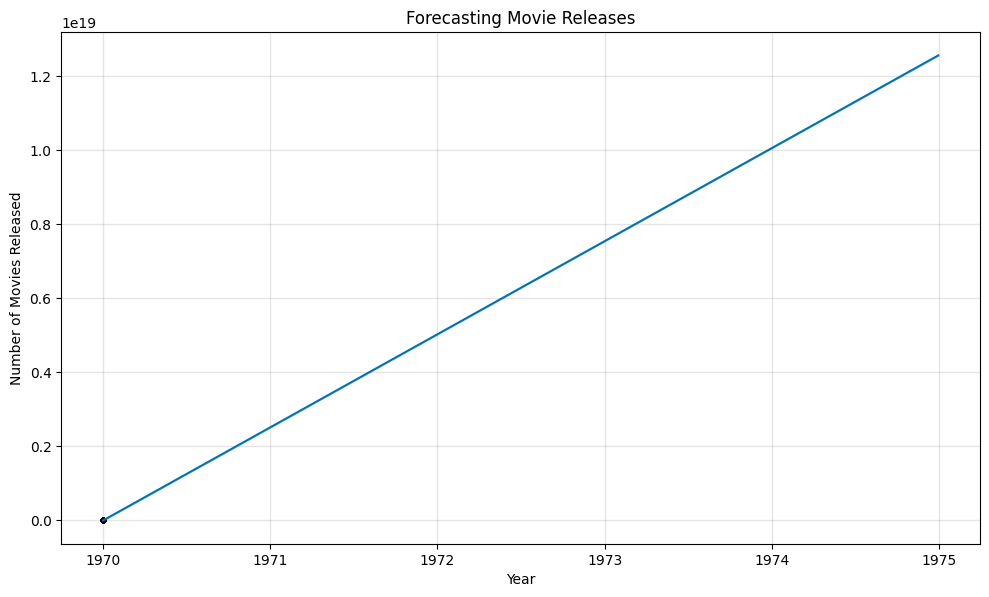

In [27]:
#Plot the forecasted number of movie releases, showing both historical data and future predictions.
fig = model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Forecasting Movie Releases')
plt.show()
